In [168]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import model_selection
from sklearn import metrics
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [169]:
df = pd.read_csv(os.getcwd() + '/DATABASE/base-reduzida-v4.csv', sep = ',')
df = df.drop(df.columns[0], axis=1)
df.head()

,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Qtde faltas no trabalho por bebida nos últimos 12M,Aviso bebida últimos 12M,Dirigir embriagado nos últimos 12M,Falta de memória após beber nos últimos 12M,Mais de 5 doses em uma ocasião nos últimos 30D,...,Diagnóstico de outras doenças mentais,Motivo impedimento atividade habitual últimas 2S,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Diagnóstico de depressão,Diagnóstico de alcoolismo,Alcoolismo e Depressão
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,1.0,1.0,2.0,0.0,12.0,1.0,1.0,2.0,1.0,2.0,...,2.0,0.0,1.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,2.0,0.0,10.0,1.0,1.0,2.0,1.0,2.0,...,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


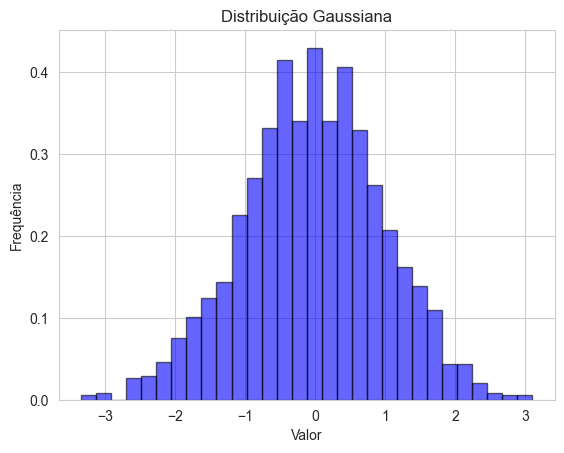

In [170]:
# Parâmetros da distribuição gaussiana
mu = 0  # Média
sigma = 1  # Desvio padrão
tamanho_amostra = len(df)  # Tamanho da amostra

# Gerar dados normalmente distribuídos
dados = np.random.normal(mu, sigma, tamanho_amostra)

# Traçar um histograma para visualizar a distribuição
plt.hist(dados, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title('Distribuição Gaussiana')
plt.grid(True)
plt.show()

In [171]:
# Todos os outliers da base
def Outlier(df):
   
   sns.boxplot(
      data = df,
      orient =  "h",
      showcaps = False,
      notch = True,
      flierprops = {"marker": "."},
      boxprops = {
         "facecolor": (.4, .6, .8, .5)
      },
      medianprops = {
         "color": "coral"
      }
   )

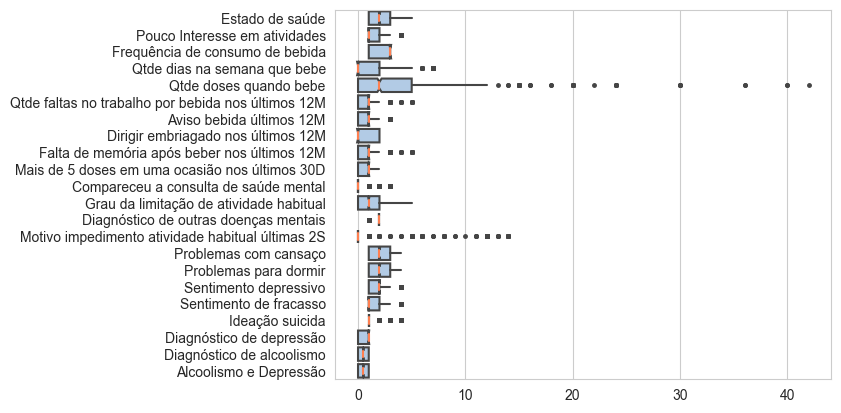

In [172]:
Outlier(df)

In [173]:
# Função para normalizar usando Min-Max
def minmax_scaling(df):
    return (df - df.min()) / (df.max() - df.min())

# Aplicando a normalização Min-Max ao DataFrame
df = minmax_scaling(df)

In [174]:
test_size = 0.4 # Tamanho do conjunto de teste
seed = 101 # Para que a separação dos dados ocorra sempre a partir da mesma semente (seed), e seja reproduzível em qualquer execução

In [175]:
#Randomizando os dados do Dataframe
df = df.sample(frac=1, random_state=seed).reset_index(drop=True)

In [176]:
X = df.drop(columns=["Alcoolismo e Depressão", "Diagnóstico de depressão", "Diagnóstico de alcoolismo"], axis=1)
y = df["Alcoolismo e Depressão"]

# Dividindo o conjunto de dados em treinamento (70%) e teste (30%)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=seed)



In [177]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn import model_selection

# # Suponha que X e Y são seus dados
# # (Como você não forneceu os dados reais de X e Y, estou usando dados fictícios para este exemplo)
# X = np.random.randn(5000)
# Y = np.random.randn(5000)

# test_size = 0.4
# seed = 101
# X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = test_size, random_state=seed)

# # Configurações do gráfico
# sns.set_style('whitegrid')
# plt.figure(figsize=(10, 6))

# # Plotando os dados de X_train e X_test
# sns.histplot(X_train, color='blue', kde=True, label='Treinamento', bins=30, alpha=0.5)
# sns.histplot(X_test, color='red', kde=True, label='Teste', bins=30, alpha=0.5)

# # Título e legendas
# plt.title('Suposição de Distribuição dos Dados')
# plt.xlabel('Valores dos Dados')
# plt.ylabel('Densidade')
# plt.legend()

# plt.show()


In [178]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Suponhamos que estes são os seus dados
# dados_treinamento = X_train
# dados_teste = np.random.randn(1000) + 2

# # Configurações do gráfico
# sns.set_style('whitegrid')
# plt.figure(figsize=(10, 6))

# # Plotando os dados
# sns.histplot(dados_treinamento, color='blue', kde=True, label='Treinamento', bins=30, alpha=0.5)
# sns.histplot(dados_teste, color='red', kde=True, label='Teste', bins=30, alpha=0.5)

# # Título e legendas
# plt.title('Suposição de Distribuição dos Dados')
# plt.xlabel('Valores dos Dados')
# plt.ylabel('Densidade')
# plt.legend()

# plt.show()


In [179]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

# Defina o modelo que você deseja avaliar
modelo = RandomForestClassifier()

# Defina o número de folds
num_folds = 10  # Você pode ajustar esse valor conforme necessário

# Defina a métrica que deseja avaliar (por exemplo, precisão)
metrica = make_scorer(precision_score)

# Crie um objeto de validação cruzada k-fold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Realize a validação cruzada e obtenha as métricas de desempenho
scores = cross_val_score(modelo, X, Y, cv=kf, scoring=metrica)

# Calcule a média das métricas
media_desempenho = scores.mean()
desvio_padrao = scores.std()

print(f'Média da Precisão: {media_desempenho}')
print(f'Desvio Padrão da Precisão: {desvio_padrao}')


Média da Precisão: 0.9962564567215729
Desvio Padrão da Precisão: 0.005727958739298265


In [180]:
rf_classifier = RandomForestClassifier()
scaler = StandardScaler()

scaler.fit(X_train)  # Ajuste aos dados de treinamento

X_train_scaled = scaler.transform(X_train)  # Padronize os dados de treinamento
X_test_scaled = scaler.transform(X_test) 

In [181]:
X_train_scaled

array([[ 0.89052254,  0.20662936, -1.16318936, ...,  1.05379887,
         1.44398468,  1.00970437],
       [-0.08275911, -0.77769362, -1.16318936, ..., -0.8051682 ,
        -0.60794572, -0.34738638],
       [ 1.86380418,  2.17527531, -1.16318936, ...,  1.98328241,
         2.46994988, -0.34738638],
       ...,
       [-1.05604076, -0.77769362,  0.93967819, ..., -0.8051682 ,
        -0.60794572, -0.34738638],
       [-0.08275911,  0.20662936,  0.93967819, ...,  1.05379887,
         2.46994988,  3.72388586],
       [ 2.83708583,  2.17527531, -1.16318936, ..., -0.8051682 ,
        -0.60794572, -0.34738638]])

In [182]:
rf_classifier.fit(X_train_scaled, y_train)  # Treine o modelo com os dados padronizados

y_pred = rf_classifier.predict(X_test_scaled)  # Faça previsões

In [183]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report = df_report.round(2) 
df_report

,precision,recall,f1-score,support
0.0,1.0,1.0,1.0,227.0
1.0,1.0,1.0,1.0,258.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,485.0
weighted avg,1.0,1.0,1.0,485.0


C:\Users\r3hab\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


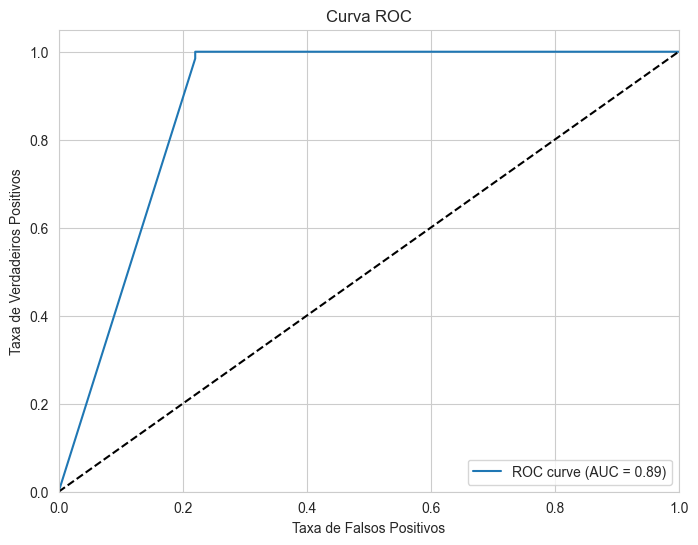

In [184]:
probs = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc_score(y_test, probs)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

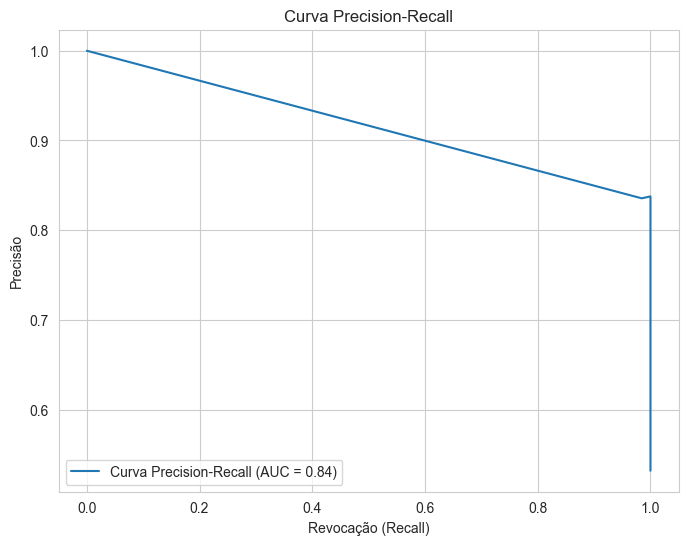

In [185]:
precision, recall, thresholds = precision_recall_curve(y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Curva Precision-Recall (AUC = {:.2f})'.format(average_precision_score(y_test, probs)))
plt.xlabel('Revocação (Recall)')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc="lower left")
plt.show()

In [186]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report = df_report.round(2) 
df_report

,precision,recall,f1-score,support
0.0,1.0,1.0,1.0,227.0
1.0,1.0,1.0,1.0,258.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,485.0
weighted avg,1.0,1.0,1.0,485.0


In [187]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import numpy as np

# Criando o modelo da RNN
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(len(X_train.columns), 1))) 

model.add(Dense(1, activation='sigmoid'))  #Camada de saída para classificação binária


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Formatando os dados em sequência para ajustar as entradas
X_train_rnn = np.expand_dims(X_train.values, axis=2)  # Adicionando uma dimensão para tratar os dados como sequências

a = model.fit(X_train_rnn, Y_train, epochs=100, batch_size=20)  # Ajustando o número de épocas e tamanho do lote

ValueError: Data cardinality is ambiguous:
  x sizes: 1129
  y sizes: 968
Make sure all arrays contain the same number of samples.

In [ ]:
# Avalie o modelo e faça previsões
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

21/21 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 0.9969
Test Loss: 0.009834029711782932
Test Accuracy: 0.9969040155410767


In [ ]:
# precision, recall, thresholds = precision_recall_curve(Y_test, probs)

# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, label='Curva Precision-Recall (AUC = {:.2f})'.format(average_precision_score(Y_test, probs)))
# plt.xlabel('Revocação (Recall)')
# plt.ylabel('Precisão')
# plt.title('Curva Precision-Recall')
# plt.legend(loc="lower left")
# plt.show()

In [ ]:
# rf = RandomForestRegressor()

# rf.fit(X_train, Y_train)
# predict = rf.predict(X_test)
# explained_variance = metrics.explained_variance_score(Y_test, predict)
# mean_absolute_error = metrics.mean_absolute_error(Y_test, predict) 
# mse = metrics.mean_squared_error(Y_test, predict) 
# mean_squared_log_error = metrics.mean_squared_log_error(Y_test, predict)
# median_absolute_error = metrics.median_absolute_error(Y_test, predict)
# r2 = metrics.r2_score(Y_test, predict)

# # Mostrando o resultado de desempenho do modelo
# print('Ex.V: ', explained_variance)
# print('MSLE: ', mean_squared_log_error)
# print('R2  : ', r2)
# print('MAE : ', mean_absolute_error)
# print('MSE : ', mse)
# print('RMSE: ', np.sqrt(mse))


In [ ]:
# # Suponha que Y_test contenha os valores reais e predict contenha os valores previstos.

# plt.figure(figsize=(8, 6))

# # Plotagem dos valores reais com marcador 'o' (círculos)
# plt.scatter(Y_test, Y_test, alpha=0.5, label='Valores Reais', marker='o')

# # Plotagem dos valores previstos com marcador 'x' (cruz)
# plt.scatter(Y_test, predict, alpha=0.5, label='Valores Previstos', marker='x')

# plt.xlabel('Valores Reais')
# plt.ylabel('Valores Previstos')
# plt.title('Gráfico de Dispersão de Valores Reais vs. Valores Previstos')
# plt.legend()  # Adiciona uma legenda ao gráfico

# plt.show()

In [ ]:
# # Histograma de Resíduos
# residuals = Y_test - predict
# residuals = np.ravel(residuals)
# plt.figure(figsize=(8, 6))
# plt.hist(residuals, bins=30)
# plt.xlabel('Resíduos')
# plt.ylabel('Frequência')
# plt.title('Histograma de Resíduos')
# plt.show()


In [ ]:
# # Gráfico de Probabilidade Normal dos Resíduos
# from scipy import stats
# plt.figure(figsize=(8, 6))
# stats.probplot(residuals, plot=plt)
# plt.title('Gráfico de Probabilidade Normal dos Resíduos')
# plt.show()

In [ ]:
# # Calcular os resíduos
# plt.figure(figsize=(8, 6))
# plt.scatter(predict, residuals, alpha=0.5)
# plt.axhline(y=0, color='r', linestyle='--')  # Linha de referência dos resíduos igual a zero
# plt.xlabel('Valores Previstos')
# plt.ylabel('Resíduos')
# plt.title('Gráfico de Resíduos vs. Valores Previstos')
# plt.show()

In [188]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf_classifier, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

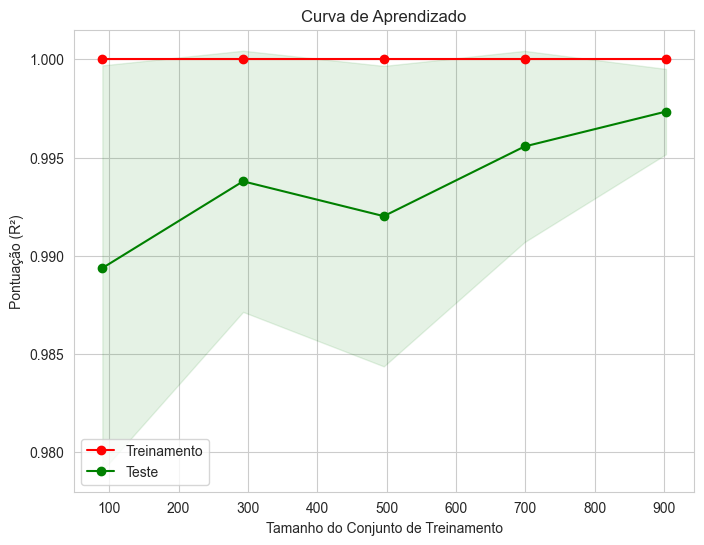

In [189]:
plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Teste")
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Pontuação (R²)')
plt.legend(loc="best")
plt.title('Curva de Aprendizado')
plt.show()